<a href="https://colab.research.google.com/github/orlandojsjunior/Data_Science/blob/main/Introdu%C3%A7%C3%A3o_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando as notas em geral

In [68]:
import pandas as pd

URL = "https://raw.githubusercontent.com/orlandojsjunior/Data_Science/main/Dados%20csv/ratings.csv"

notas = pd.read_csv(URL)
notas.head()



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [69]:
notas.shape


(100836, 4)

In [70]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [71]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [72]:
notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [73]:
print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


In [74]:
notas.nota.head()


0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

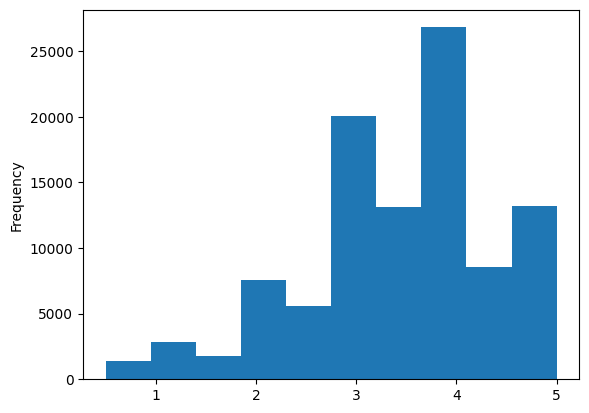

In [75]:
notas.nota.plot(kind='hist')

Descreve outras medidas de descrição dos dados

In [76]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota'>

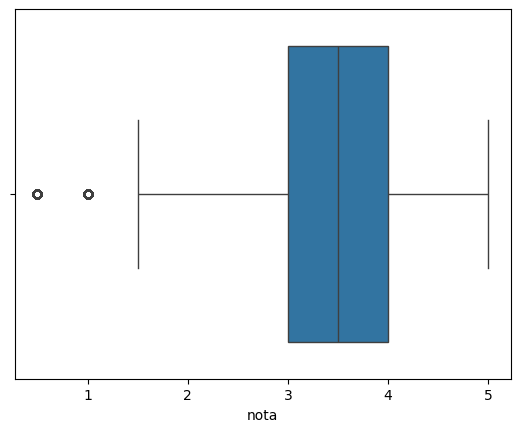

In [77]:
import seaborn as sns

sns.boxplot(x=notas.nota)

# 02 - Analise Exploratoria

In [78]:
URL = "https://raw.githubusercontent.com/orlandojsjunior/Data_Science/main/Dados%20csv/movies.csv"

filmes = pd.read_csv(URL)

filmes.columns = ["filmesId", "titulo", "genero"]

filmes.head()

,filmesId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [79]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



# Analisando algumas notas especificas por filme


Fazendo perguntas aos dados

In [80]:
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [81]:
notas.query("filmeId==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [82]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [83]:
notas.query("filmeId==2")

,usuarioId,filmeId,nota,momento
560,6,2,4.0,845553522
1026,8,2,4.0,839463806
1773,18,2,3.0,1455617462
2275,19,2,3.0,965704331
2977,20,2,3.0,1054038313
...,...,...,...,...
95102,600,2,4.0,1237764627
95965,602,2,4.0,840875851
97044,604,2,5.0,832080293
97144,605,2,3.5,1277176522


In [84]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [85]:
notas.groupby('filmeId')

In [86]:
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

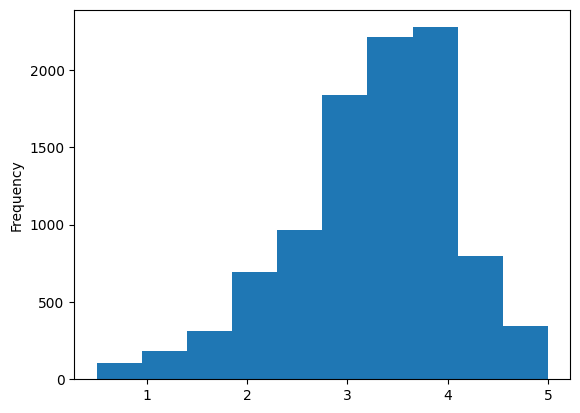

In [87]:
medias_por_filme.plot(kind="hist")


<Axes: xlabel='nota'>

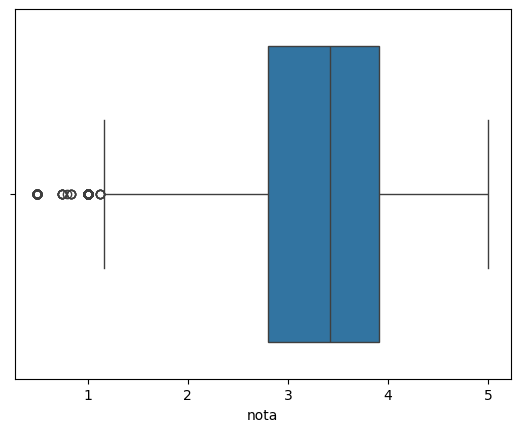

In [88]:
sns.boxplot(x=medias_por_filme)

In [89]:
medias_por_filme.describe()


count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota', ylabel='Count'>

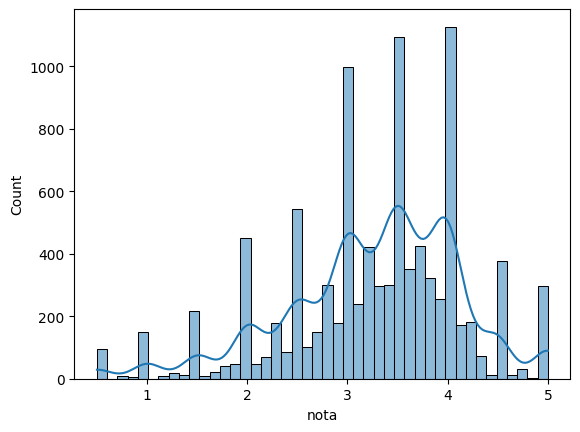

In [90]:
sns.histplot(medias_por_filme, kde=True)


# Updating code that uses seaborn.distplot

Mas esse histograma parece diferente daquele do Pandas, não? Isso acontece pois o histograma é gerado com base em um número de separações (as barras). No caso do Pandas, tínhamos 10 separações; e no Seaborn, bem mais que isso. Com o argumento bins, podemos definir esse número. Se atribuirmos 10, por exemplo, teremos um histograma praticamente idêntico ao do Pandas:

<Axes: xlabel='nota', ylabel='Count'>

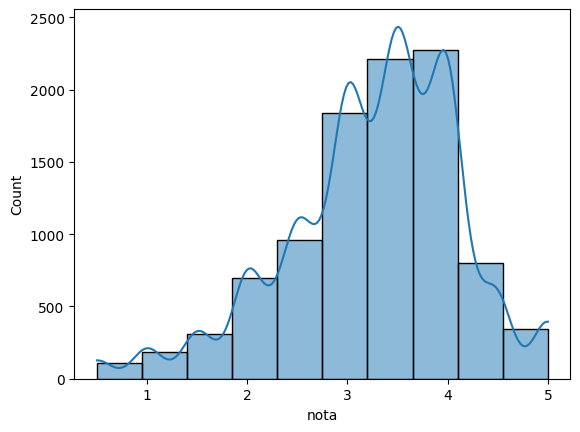

In [91]:
sns.histplot(medias_por_filme, kde=True, bins=10)


(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

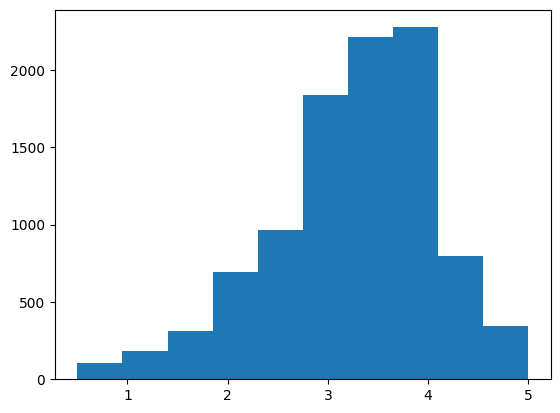

In [92]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)


Assim como nas outras bibliotecas, podemos consultar a documentação do Matplotlib para descobrirmos outras operações e funcionalidades. Um exemplo é mostrarmos o título do gráfico, com plt.title():

Text(0.5, 1.0, 'Histograma das médias dos filmes')

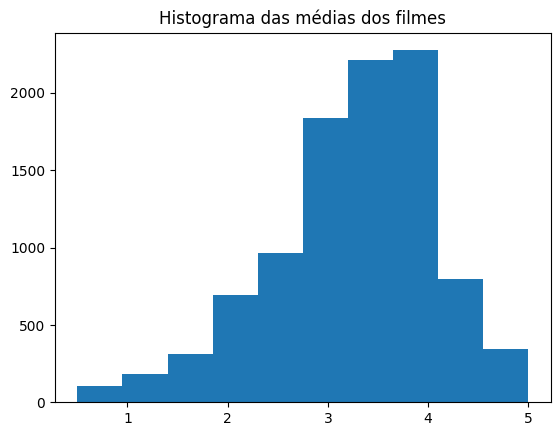

In [93]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")


Esse tipo de configuração também pode ser feita no Seaborn: na prática, o boxplot costuma ser feito na vertical (eixo y), e não na horizontal (eixo x).

<Axes: ylabel='nota'>

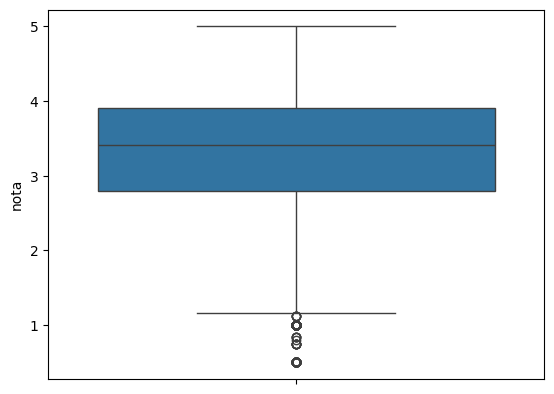

In [94]:
sns.boxplot(y=medias_por_filme)


Outra configuração possível é em relação ao tamanho da imagem. Com a função figure() e o argumento figsize, podemos definir uma proporção para nosso boxplot, como 5x8:

<Axes: ylabel='nota'>

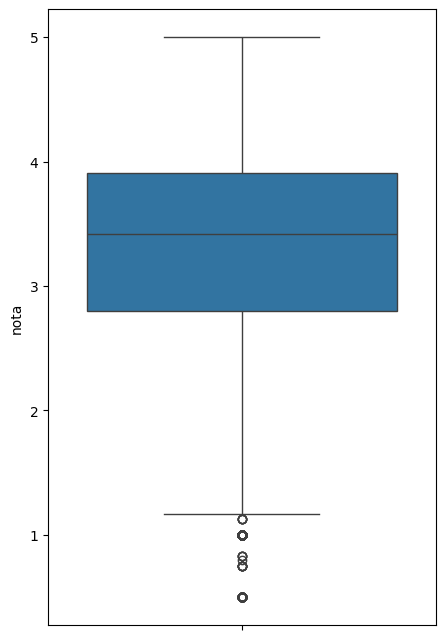

In [95]:
plt.figure(figsize=(5,8))

sns.boxplot(y=medias_por_filme)


# Faça como eu fiz na aula

<Axes: ylabel='Frequency'>

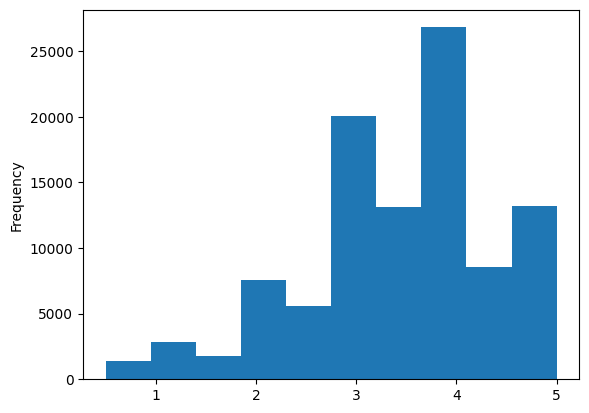

In [96]:
notas.nota.plot(kind='hist')


In [97]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

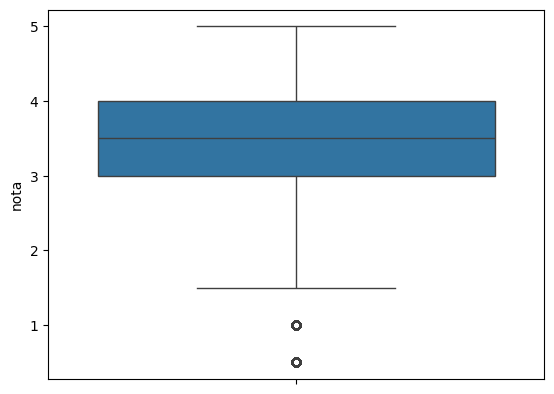

In [98]:
import seaborn as sns

sns.boxplot(notas.nota)



In [99]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [100]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [101]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

# 03 - Tipos de Variaveis

In [102]:

URL = "https://raw.githubusercontent.com/orlandojsjunior/Data_Science/main/Dados%20csv/tmdb_5000_movies.csv"

tmdb = pd.read_csv(URL)
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [103]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [104]:
# primeiro grau
# segundo grau
# terceiro grau
# 1 grau < 2 grau < 3 grau # categoria ordinal

In [105]:
# budget => orçamento =>  quantitativa continuo

In [106]:
# quantidade de votos => 1, 2, 3, 4, não tem 2.5 votos
# notas do movielens => 0.5, 1, 1.5, ..., 5 -  nao tem 2,7

# Exercicio: Faça como eu fiz na aula

In [107]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

# 04 - Data Visualization

In [108]:
tmdb["original_language"].value_counts() # Faz a contagem dos valores contido nas colun a esficificada

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [109]:
tmdb["original_language"].value_counts().to_frame() # transforma em dataframe

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [110]:
tmdb["original_language"].value_counts().to_frame().reset_index()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [111]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [112]:
print(contagem_de_lingua)

   original_language  total
0                 en   4505
1                 fr     70
2                 es     32
3                 zh     27
4                 de     27
5                 hi     19
6                 ja     16
7                 it     14
8                 cn     12
9                 ru     11
10                ko     11
11                pt      9
12                da      7
13                sv      5
14                nl      4
15                fa      4
16                th      3
17                he      3
18                ta      2
19                cs      2
20                ro      2
21                id      2
22                ar      2
23                vi      1
24                sl      1
25                ps      1
26                no      1
27                ky      1
28                hu      1
29                pl      1
30                af      1
31                nb      1
32                tr      1
33                is      1
34                xx

<Axes: xlabel='original_language', ylabel='total'>

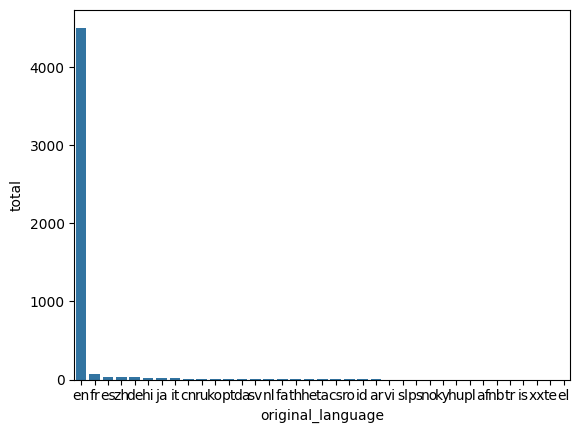

In [113]:
sns.barplot(x="original_language", y="total", data = contagem_de_lingua)

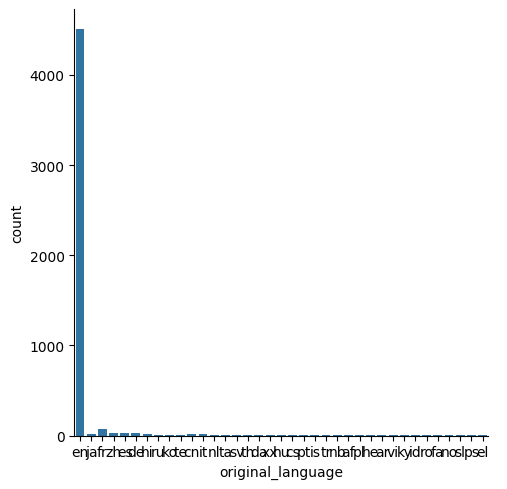

In [114]:
sns.catplot(x="original_language", kind="count", data=tmdb) # O catplo ja imprimiu por categoria contando cada uma das aparicões

([<matplotlib.patches.Wedge at 0x1283fd9c0b0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

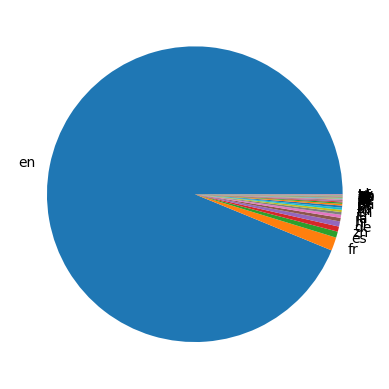

In [115]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [116]:
# Atribuindo valores

total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [117]:
# Criando um DataFrame "planilha"
# Dados  = dicinario do Python

dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}

pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


In [118]:
# podemos sobrescrevermos a variável, mantendo os mesmos resultados

dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

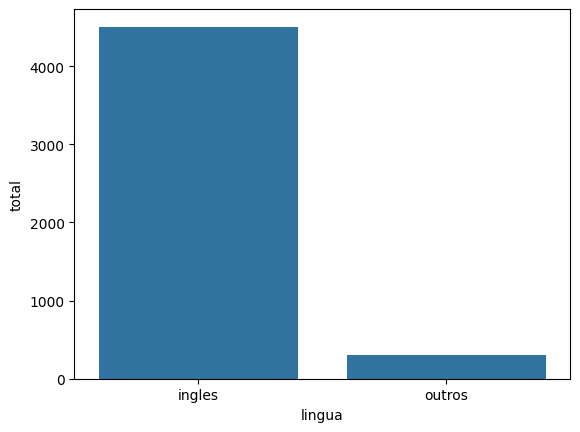

In [119]:
sns.barplot(x = "lingua", y = "total", data = dados)

In [120]:
tmdb.query("original_language != 'en'") # perguntado aos dados quais os idiomas diferentes do ingles

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

In [121]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts() # atribuindo um retorno a um a varavel - todas as linhas em que a língua original não é inglês. Dentro desse conjunto, podemos fazer a contagem dos valores:
total_por_lingua_de_outros_filmes

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

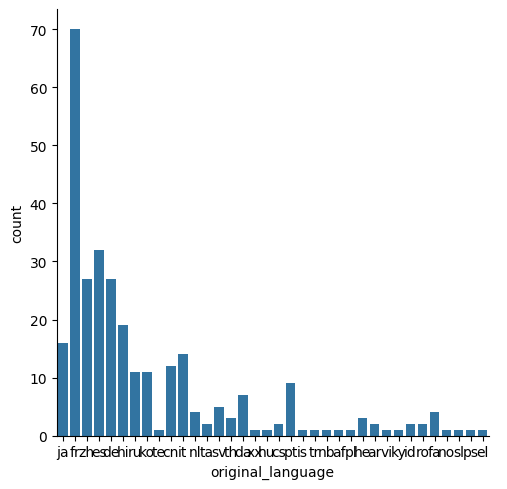

In [122]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x= "original_language", kind="count", data=filmes_sem_lingua_original_em_ingles)

# Exercicio - Faça como eu fiz na aula

In [123]:
# Com os dados do TMDB já em leitura e a biblioteca do Seaborn importada, faremos uma avaliação de quantos idiomas existem no nosso .csv, primeiro efetuando a contagem dos valores e dos índices.

tmdb["original_language"].value_counts().index

tmdb["original_language"].value_counts().values



array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [124]:
# Em seguida, contaremos os valores da coluna original_language, transformando-os em um dataframe, e reiniciaremos o índice da coluna. Terminaremos exibindo os 5 primeiros elementos:

contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.head()

,original_language,count
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


In [125]:
contagem_de_lingua.columns = ["original_language", "total"] # Criando colunas
contagem_de_lingua.head()


,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

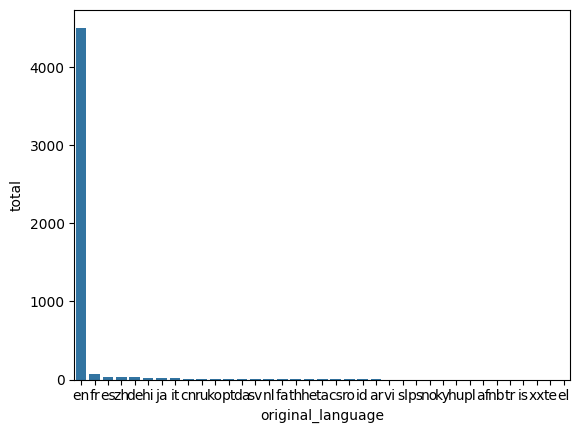

In [126]:
sns.barplot(x="original_language", y = "total", data = contagem_de_lingua)  # criando um gráfico de barras com o catplot(), passando o argumento kind="count" para que ele efetue a contagem dos elementos em cada categoria:

Pergunta : Analisando essas construções e lembrando dos conhecimentos adquiridos em aula, como podemos gerar um gráfico de pizza?

([<matplotlib.patches.Wedge at 0x12841deb380>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

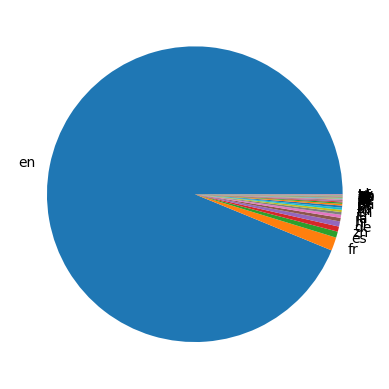

In [127]:
# Resposta

import matplotlib.pyplot as plt # 1 importando a biblioteca

plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"]) # Respondendo a pergunta acima

# 05 - Continuando com visualização

Refinando visualizações

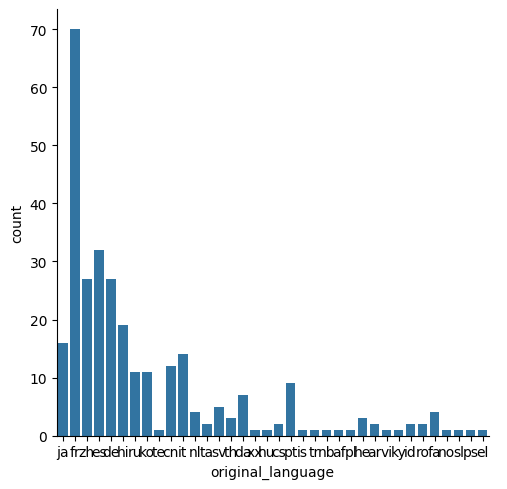

In [128]:
# Gerando o grafico

filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x= "original_language", kind="count", data=filmes_sem_lingua_original_em_ingles)

<Figure size 500x1000 with 0 Axes>

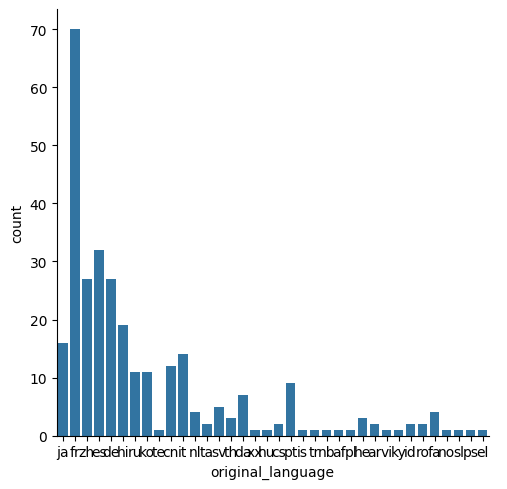

In [129]:
# Refinando o gráficos

plt.figure(figsize=(5,10))

sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

# Após a execução... nosso gráfico continuará o mesmo! Mas por que isso aconteceu?

# O Seaborn tem dois tipos de funções. O primeiro corresponde às funções que trabalham nos eixos e que são de mais baixo nível, como a barplot(). Nesse caso, é possível configurar manualmente a figura que será gerada, para, em seguida, plotar o gráfico nesta figura.

# Porém, existem funções que não funcionam nos eixos de uma imagem configurada previamente, mas sim em uma caracterizada automaticamente pelo próprio Seaborn. E adivinhe: a catplot() faz parte deste segundo tipo, já que é uma função de mais alto nível e que, inclusive, chama outra função (acatplot()) no processo.

# Portanto, na tentativa de gerar o gráfico de barras, a linha plt.figure(figsize=5,10) é completamente ignorada.

# Para solucionarmos esse problema, buscaremos um modo de controlar o aspecto da imagem na documentação do catplot().

# Encontraremos que, por padrão, o catplot() tem os parâmetros height=1 (que corresponde à altura) e aspect=1. Dobrando este último valor (aspect=2), conseguiremos gerar o retângulo que desejamos:


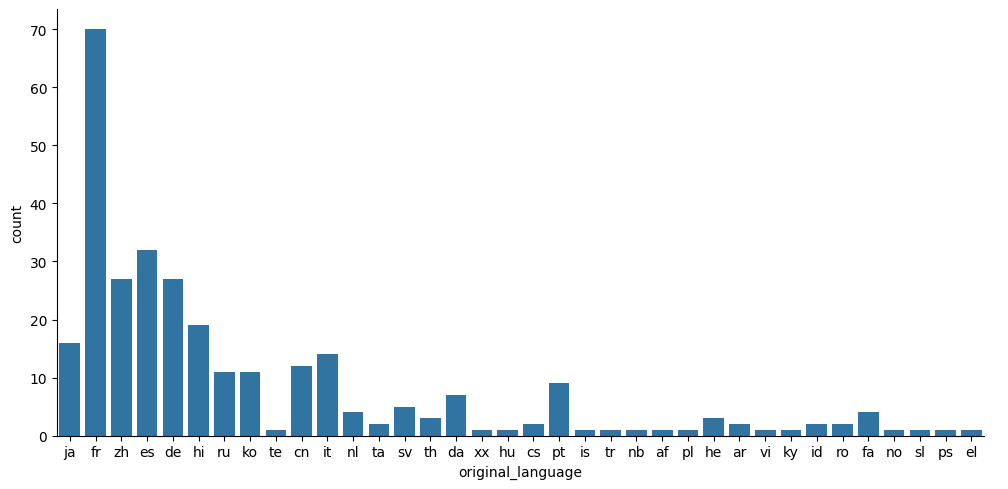

In [130]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count", aspect=2)


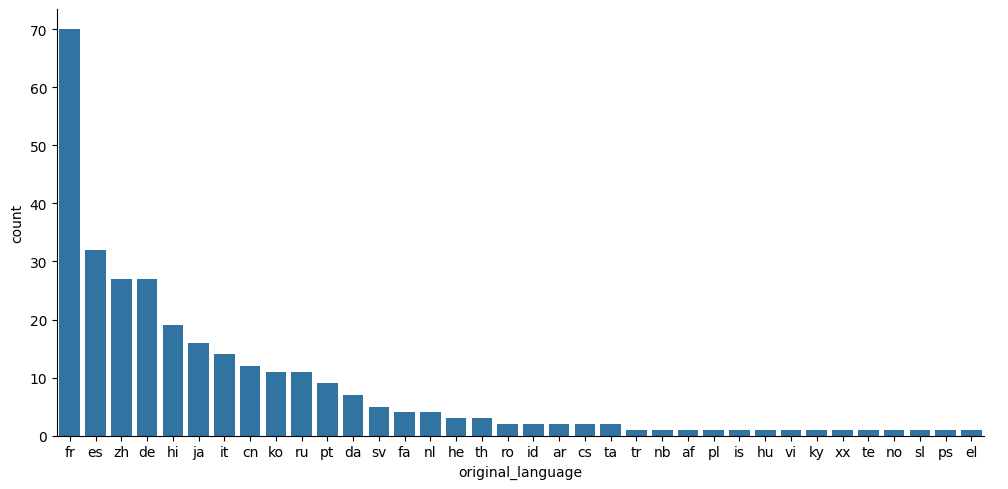

In [131]:
# Organizando por categoria usando a função catplot() e o argumento order, recebendo como atributo total_por_lingua_de_outros_filmes.index — já que, como é possível verificar nas aulas anteriores, o índice dessa série já está ordenado do maior valor para o menor.

sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles,
            kind="count",
            aspect=2,
            order = total_por_lingua_de_outros_filmes.index)

C:\Users\orlan\AppData\Local\Temp\ipykernel_8636\1147163285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles,


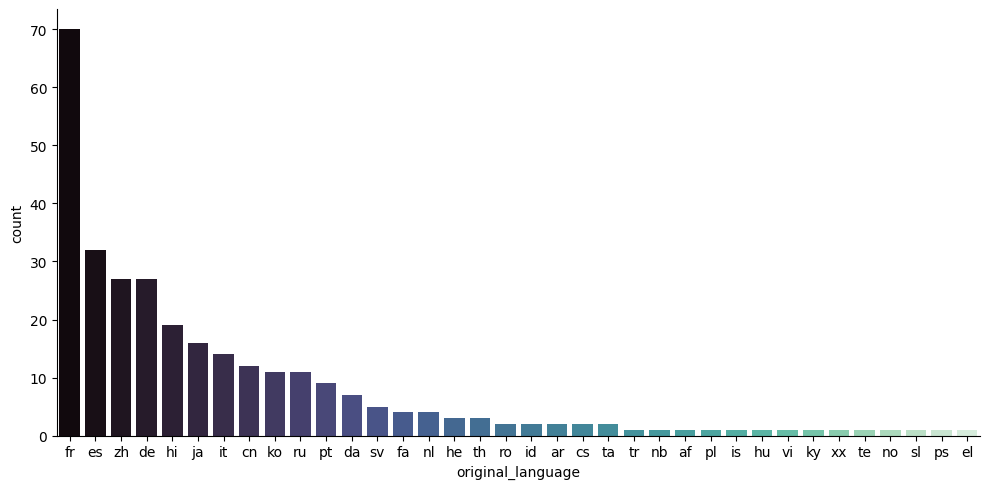

In [132]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles,
            kind="count",
            aspect=2,
            palette="mako",
            order = total_por_lingua_de_outros_filmes.index)

# Execicio - Faça como eu fiz na aula

In [144]:
# Seguindo o contexto da aula com o dados do TMDB e a biblioteca do Seaborn importada, vamos verificar a quantidade de línguas que existem no nosso dataframe.

# Começaremos contando os valores das categorias (línguas) que existem no nosso CSV. Em seguida, somaremos esses valores, alocando-os a uma variável total_geral. Dessa variável, iremos subtrair somente os filmes cuja língua é inglês (en), resultando no nosso total_do_resto:

total_por_lingua = tmdb["original_language"].value_counts()

total_geral = total_por_lingua.sum()

total_de_ingles = total_por_lingua.loc["en"]

total_de_ingles


4505

In [137]:

total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [143]:
# Prosseguindo, criaremos um dicionário do Pandas contendo duas colunas: "língua", dividida entre ingles e outros; e "total", com os valores de total_de_ingles e total_do_resto. Com esse dicionário, geraremos um dataframe:

dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)

dados


,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

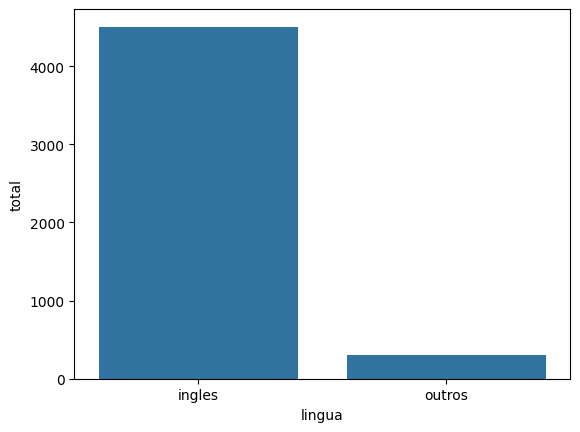

In [139]:
# Plotaremos, então, um gráfico de barras no qual o eixo x serão as nossas línguas, e o y as ocorrências no conjunto:

sns.barplot(x="lingua", y="total", data = dados)

In [142]:
# Feito isso, criaremos uma nova variável total_por_lingua_de_outros_filmes, que receberá uma query() retornando todos os valores das categorias diferentes de en:

total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

total_por_lingua_de_outros_filmes

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: count, dtype: int64

In [148]:
# Já a variável filmes_sem_lingua_original_em_ingles receberá somente o conjunto de dados dessas línguas:

filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

filmes_sem_lingua_original_em_ingles

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

Após esses procedimentos, como podemos gerar um gráfico de barras somente com as línguas diferentes do inglês?

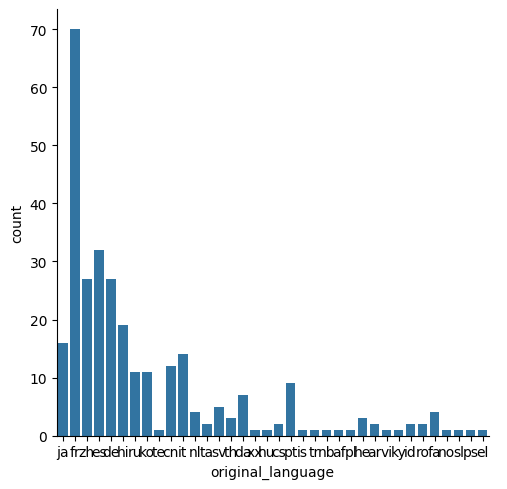

In [159]:
sns.catplot(x="original_language", 
            data=filmes_sem_lingua_original_em_ingles,
            kind="count", 
            )

# 06 - Dados e Estatísticas

In [169]:
filmes.head(2) # O (2)  seleciona apenas os dois primeiros elementos

,filmesId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [162]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [174]:
notas.query("filmeId==1") # perguntando para os dados quais as notas apenas do filmes 1

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [168]:
notas.query("filmeId==2") # perguntando para os dados quais as notas apenas do filmes 2

,usuarioId,filmeId,nota,momento
560,6,2,4.0,845553522
1026,8,2,4.0,839463806
1773,18,2,3.0,1455617462
2275,19,2,3.0,965704331
2977,20,2,3.0,1054038313
...,...,...,...,...
95102,600,2,4.0,1237764627
95965,602,2,4.0,840875851
97044,604,2,5.0,832080293
97144,605,2,3.5,1277176522


In [172]:
# Pegando o resutado das query e atribuindo valores

notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")

print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [182]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean()) 
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [180]:
print("Mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())

Mediana do Toy Story 4.00
Mediana do Jumanji 3.50


In [184]:
import numpy as np # trabalhando com array numericas para analise de dados

np.array([2.5] * 10).mean()

2.5

In [185]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))

filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [186]:
print(filme1.mean(), filme2.mean())

3.0 3.0


In [187]:
print(np.median(filme1), np.median(filme2))

3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

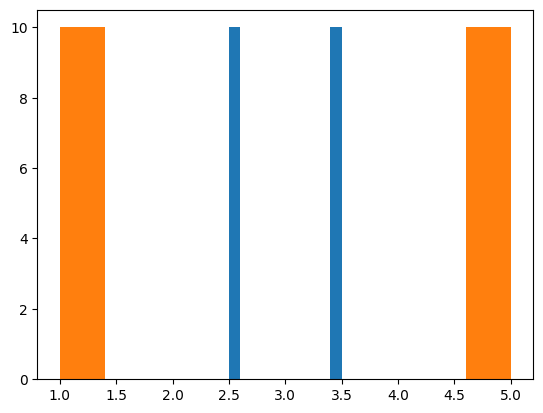

In [188]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1284507a540>,
 'caps': [<matplotlib.lines.Line2D at 0x1284507ab40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1284507a300>,
 'medians': [<matplotlib.lines.Line2D at 0x1284507b140>,
 'fliers': [<matplotlib.lines.Line2D at 0x1284507b410>,
 'means': []}

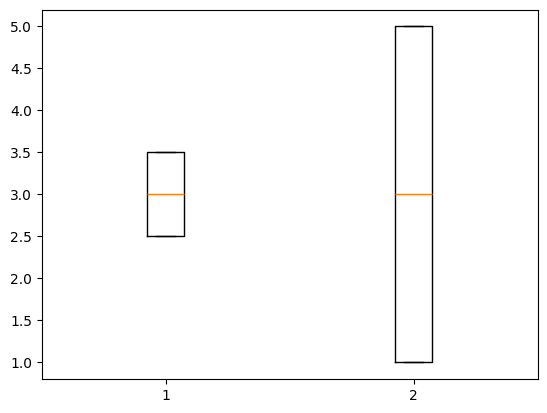

In [189]:
plt.boxplot([filme1,filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x128450f66c0>,
 'caps': [<matplotlib.lines.Line2D at 0x128450f6bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x128450f6450>,
 'medians': [<matplotlib.lines.Line2D at 0x128450f7200>,
 'fliers': [<matplotlib.lines.Line2D at 0x128450f7470>,
 'means': []}

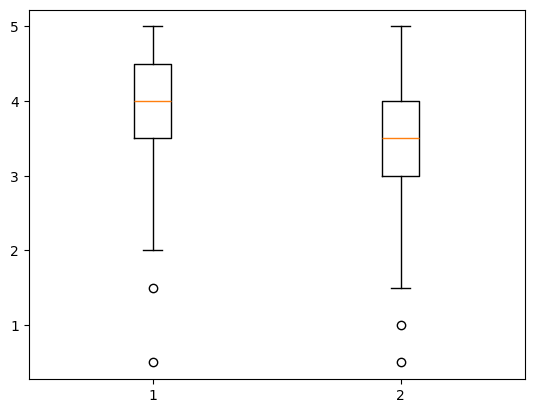

In [190]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

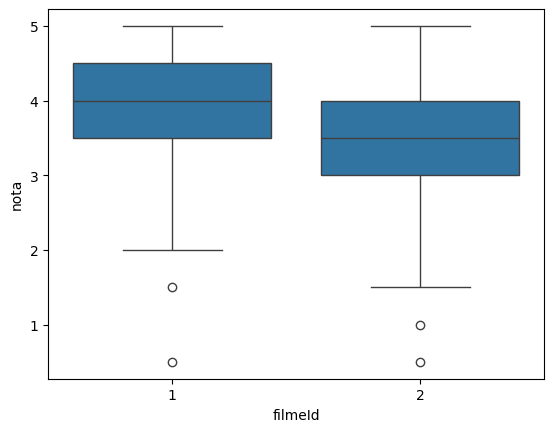

In [191]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2)"))

<Axes: xlabel='filmeId', ylabel='nota'>

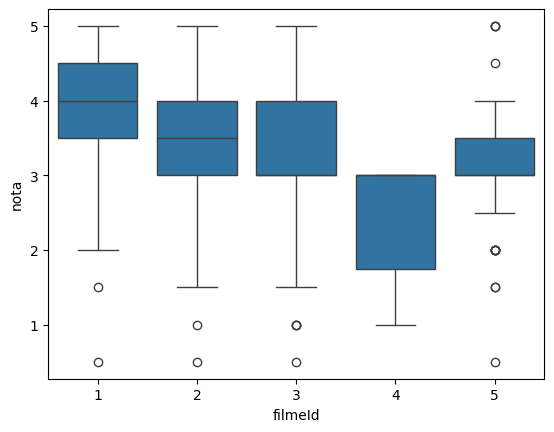

In [192]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2,3,4,5)"))

In [193]:
print("Desvio padrão do Jumanji %.2f" % notas_do_jumanji.nota.std(), "Desvio padrão do Toy Story %.2f" % notas_do_toy_story.nota.std())

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83


In [195]:
# Desvio padrão

print(np.mean(filme1), np.mean(filme2))
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0
